# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [50]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [52]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [53]:
# Create a Beautiful Soup Object
response = browser.html
soup = soup(response, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [54]:
# Extract all rows of data
all_data = soup.body.find_all('tr', class_='data-row')
len(all_data)

1867

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [55]:
# Create an empty list
data_list = []
# Loop through the scraped data to create a list of rows
for row in all_data:
    td_list = []
    
    for td in row:
        td_list.append(td.text)
    data_list.append(td_list) 
print(data_list[0:3])        
      

[['\n', '2', '\n', '2012-08-16', '\n', '10', '\n', '155', '\n', '6', '\n', '-75.0', '\n', '739.0', '\n'], ['\n', '13', '\n', '2012-08-17', '\n', '11', '\n', '156', '\n', '6', '\n', '-76.0', '\n', '740.0', '\n'], ['\n', '24', '\n', '2012-08-18', '\n', '12', '\n', '156', '\n', '6', '\n', '-76.0', '\n', '741.0', '\n']]


In [56]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = []
cols = soup.body.find('tr')
for name in cols:
    column_names.append(name.text)
column_names   
df = pd.DataFrame(data_list)
df.columns = (column_names)
weather_df = df[['id','terrestrial_date','sol','ls','month','min_temp','pressure']]

In [57]:
# Confirm DataFrame was created successfully

weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [58]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [59]:
# Change data types for data analysis
weather_df2 = weather_df.astype({'id':'int',
                                 'terrestrial_date' : 'datetime64[ns]',
                                 'sol'      : 'int',
                                 'ls'       : 'int',
                                 'month'    : 'int',
                                 'min_temp' : 'float',
                                 'pressure' : 'float'})

In [60]:
# Confirm type changes were successful by examining data types again
weather_df2.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [61]:
# 1. How many months are there on Mars?
print(weather_df2['month'].unique())
months = weather_df2['month'].unique().max() 
print(months) 
print("-----------------------------")
print(f"Question - 1. there are {weather_df2['month'].max()} months on Mars")
print("-----------------------------")
print(weather_df2['month'].value_counts().sort_index())

[ 6  7  8  9 10 11 12  1  2  3  4  5]
12
-----------------------------
Question - 1. there are 12 months on Mars
-----------------------------
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [62]:
# 2. How many Martian days' worth of data are there?

print("-----------------------------")
print(f"Question - 2. there are {weather_df2['sol'].nunique()} Martian days' worth of data")
print("-----------------------------")

-----------------------------
Question - 2. there are 1867 Martian days' worth of data
-----------------------------


In [63]:
# 3. What is the average low temperature by month?
average_low = weather_df2.groupby("month").mean()
print("-----------------------------")
print(f"Question - 3. the average low temperature by month is:")
print("-----------------------------")
print(average_low['min_temp'])      

-----------------------------
Question - 3. the average low temperature by month is:
-----------------------------
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


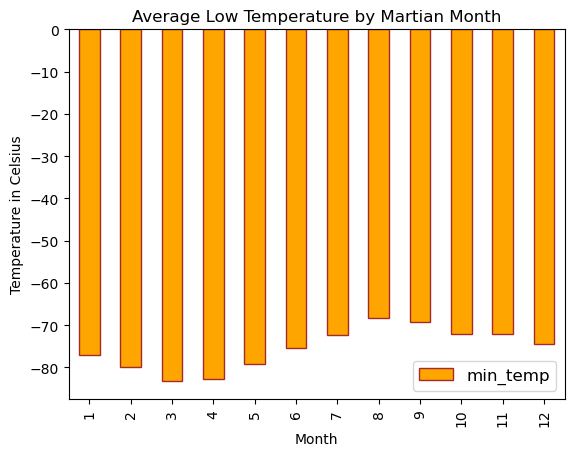

In [64]:
# Plot the average temperature by month
bar_chart = average_low.plot(kind='bar', y='min_temp', rot=90,  color='orange', edgecolor='brown')
plt.legend(loc='best', fontsize="12")
plt.title("Average Low Temperature by Martian Month")
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.savefig("Average Temperature by Month Bar Chart.png")
plt.show()

In [65]:
# Identify the coldest and hottest months in Curiosity's location
coldest_temp =  average_low['min_temp'].min()
hottest_temp =  average_low['min_temp'].max()
sort_avg_low = average_low.sort_values('min_temp')
sort_avg_low = sort_avg_low.reset_index()
coldest_month = sort_avg_low.iloc[0,0]
hottest_month = sort_avg_low.iloc[11,0]

print(f"The coldest month is: {coldest_month} with average minimum temperature of {coldest_temp}")
print(f"The hottest month is: {hottest_month} with average minimum temperature of {hottest_temp}") 

The coldest month is: 3 with average minimum temperature of -83.30729166666667
The hottest month is: 8 with average minimum temperature of -68.38297872340425


In [66]:
# 4. Average pressure by Martian month
print("-----------------------------")
print(f"Question - 4. the average pressure by Martian month is:")
print("-----------------------------")
print(average_low['pressure'])      

-----------------------------
Question - 4. the average pressure by Martian month is:
-----------------------------
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


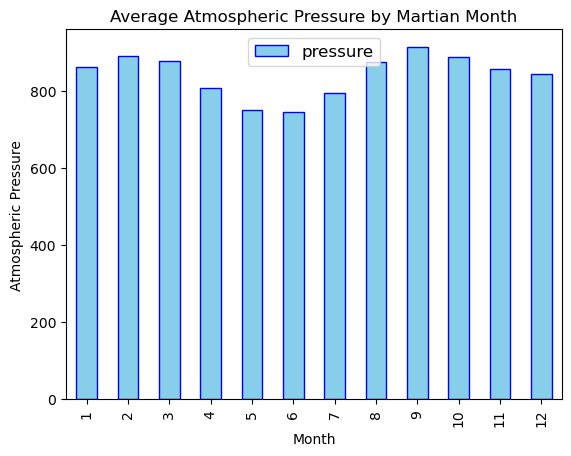

In [67]:
# Plot the average pressure by month
bar_chart = average_low.plot(kind='bar', y='pressure', rot=90,  color='skyblue', edgecolor='blue')
plt.legend(loc='best', fontsize="12")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.savefig("Average Pressure by Month Bar Chart.png")
plt.show()

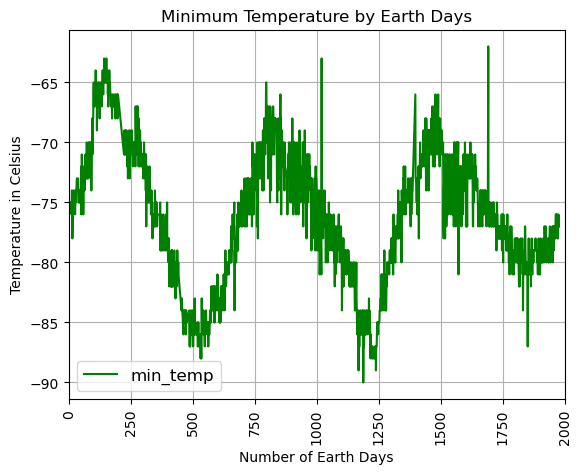

In [68]:
# 5. How many terrestrial (earth) days are there in a Martian year?
chart = weather_df2.plot(x='sol', y='min_temp', rot=90, color='green')
plt.legend(loc='best', fontsize="12")
plt.title("Minimum Temperature by Earth Days")
plt.xlabel("Number of Earth Days")
plt.ylabel("Temperature in Celsius")
plt.grid(True, axis='x')
plt.grid(True, axis='y')
plt.xlim(0, 2000)
plt.savefig("Minimum Temperature by Earth Days Chart.png")
plt.show()

In [69]:
print("-----------------------------")
print(f"Question - 5. There are about 675 terrestrial (earth) days in a Martian year")
print("-----------------------------")

-----------------------------
Question - 5. There are about 675 terrestrial (earth) days in a Martian year
-----------------------------


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

Peak-to-Peak
800 - 150 = 650
1500 - 800 = 700
Trough-to-Trough
1200 - 525 = 675
Average of all three values = 675 days

This is very close to the actual number of 687 Earth days Source: Nasa

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [70]:
# Write the data to a CSV
weather_df2.to_csv("mars_weather.csv", header=True, index=False, date_format="%Y-%m-%d")

In [71]:
browser.quit()